In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

In [2]:
train=pd.read_csv('D:\\python\\Titanic_ML\\deep\\train.csv')

In [3]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [9]:
test=pd.read_csv('D:\\python\\Titanic_ML\\deep\\test.csv')

In [10]:
test.shape

(28000, 784)

In [12]:
X_train=(train.iloc[:,1:].values).astype('float32')
y_train=train.iloc[:,0].values.astype('int32')
X_test=test.values.astype('float32')

In [16]:
X_train.shape

(42000, 784)

In [17]:
y_train.shape

(42000,)

In [18]:
X_test.shape

(28000, 784)

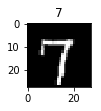

<Figure size 720x360 with 0 Axes>

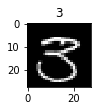

<Figure size 720x360 with 0 Axes>

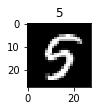

<Figure size 720x360 with 0 Axes>

In [22]:
X_train=X_train.reshape(X_train.shape[0], 28, 28)
for i in range(6,9):
    plt.subplot(330+(i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])
    plt.figure(figsize=(10,5))
    plt.show()

In [23]:
X_train=X_train.reshape(X_train.shape[0], 28, 28,1)


In [24]:
X_train.shape

(42000, 28, 28, 1)

In [25]:
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [26]:
mean_px=X_train.mean().astype(np.float32)
std_px=X_train.std().astype(np.float32)

def standardize(x):
    return (x - mean_px)/std_px

In [27]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train)
num_classes=y_train.shape[1]
num_classes

10

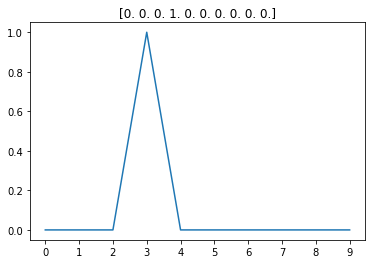

In [33]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));
#plt.show()

In [34]:
seed=43
np.random.seed(seed)

In [35]:
from keras.models import Sequential
from keras.layers import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [36]:
model=Sequential()
model.add(Lambda(standardize, input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape", model.input_shape)
print("output shape", model.output_shape)


input shape (None, 28, 28, 1)
output shape (None, 10)


In [37]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
from keras.preprocessing import image
gen=image.ImageDataGenerator()

In [42]:
from sklearn.model_selection import train_test_split
X=X_train
y=y_train
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.10,random_state=42 )
batches=gen.flow(X_train, y_train, batch_size=64)
val_baches=gen.flow(X_val, y_val, batch_size=64)

In [43]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, validation_data=val_baches,
                           validation_steps=val_baches.n)

Epoch 1/3
30618/30618 [==============================] - 129s 4ms/step - loss: 0.2390 - acc: 0.9347 - val_loss: 0.3207 - val_acc: 0.9180
Epoch 2/3
30618/30618 [==============================] - 122s 4ms/step - loss: 0.2095 - acc: 0.9436 - val_loss: 0.3570 - val_acc: 0.9101
Epoch 3/3
30618/30618 [==============================] - 116s 4ms/step - loss: 0.2017 - acc: 0.9460 - val_loss: 0.3687 - val_acc: 0.9127


In [44]:
history_dict=history.history
history_dict.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

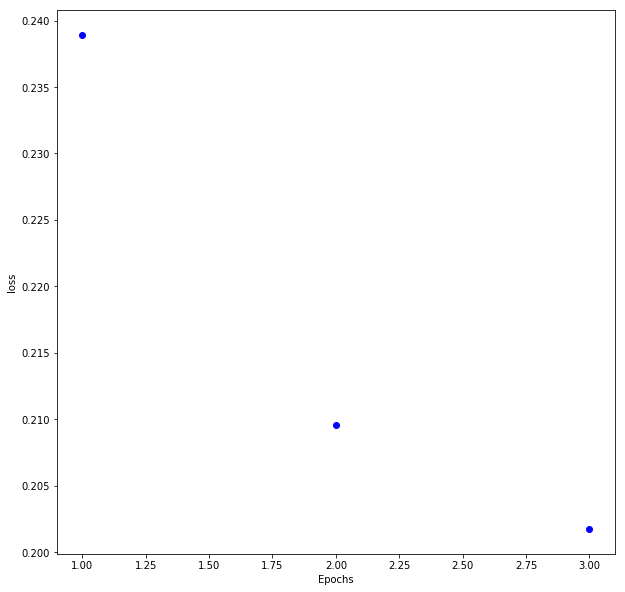

In [50]:
%matplotlib inline 
plt.figure(figsize=(10,10))
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo')
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()


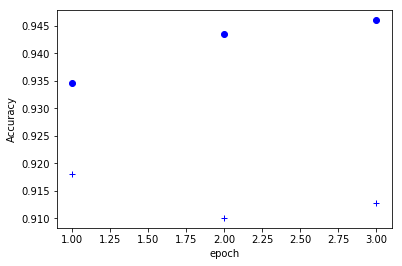

In [51]:
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel("epoch")
plt.ylabel('Accuracy')
plt.show()

In [53]:
def get_fc_model():
    model=Sequential([
        Lambda(standardize, 
        input_shape=(28,28,1)), 
        Flatten(), 
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')])
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
        
    

In [54]:
fc=get_fc_model()
fc.optimizer.lr=0.01

In [55]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n,epochs=1, validation_data=val_baches, validation_steps=val_baches.n)

Epoch 1/1
30618/30618 [==============================] - 569s 19ms/step - loss: 0.1384 - acc: 0.9738 - val_loss: 0.4470 - val_acc: 0.9544


In [78]:
from keras.layers import Convolution2D, MaxPooling2D
def get_cnn_model():
    model=Sequential([
        Lambda(standardize, input_shape=(28, 28, 1)), 
        Convolution2D(32, (3,3), activation='relu'),
        Convolution2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64, (3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [79]:
model=get_cnn_model()
model.optimizer.lr=0.01

In [ ]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_baches,
                           validation_steps=val_baches.n)

Epoch 1/1
  121/30618 [..............................] - ETA: 26:22:21 - loss: 14.4677 - acc: 0.0963